In [1]:
import numpy as np
data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=20,
  callbacks=[checkpoint],
  validation_split=0.2)

print(model.evaluate(test_data,test_target))

Train on 990 samples, validate on 248 samples
Epoch 1/20
960/990 [============================>.] - ETA: 1s - loss: 0.6961 - accuracy: 0.5594WARNING:tensorflow:From C:\Users\HP\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
990/990 [==============================] - 73s 74ms/sample - loss: 0.6930 - accuracy: 0.5646 - val_loss: 0.5978 - val_accuracy: 0.6976
Epoch 2/20
990/990 [==============================] - 64s 65ms/sample - loss: 0.4407 - accuracy: 0.8111 - val_loss: 0.4904 - val_accuracy: 0.7500
Epoch 3/20
990/990 [==============================] - 64s 64ms/sample - loss: 0.2806 - accuracy: 0.8939 - val_loss: 0.4880 - val_accuracy: 0.7702
Epoch 4/20


[0.2829094174730531, 0.92753625]


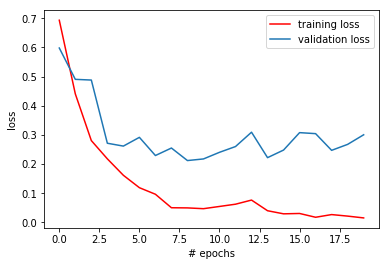

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

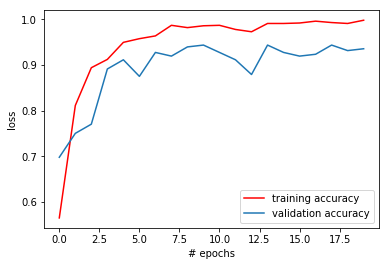

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data, test_target))

138/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================